### Preliminary overview

This notebook uses the data from the runs of biogeochemical model adjusted for the Wadden Sea.

In [36]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray as xr
import seaborn as sns
sns.set()

#### Check surface fluxes of CO$_2$

In [37]:
#ds = xr.open_dataset('data/results_so4_adv/5_po75-25_di10e-9/water.nc')
ds = xr.open_dataset('data/no_denitrification/water.nc')
dicflux_df = ds['B_C_DIC   _flux'].to_dataframe()
oxyflux_df = ds['B_BIO_O2  _flux'].to_dataframe()
dicflux_surface = dicflux_df.groupby('z_faces').get_group(0)
oxyflux_surface = oxyflux_df.groupby('z_faces').get_group(0)
dicflux_surface_year = dicflux_surface.loc['2011-01-01':'2011-12-31']
oxyflux_surface_year = oxyflux_surface.loc['2011-01-01':'2011-12-31']

In [38]:
ox = np.arange(1,366,1)

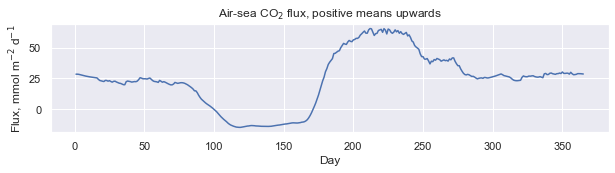

In [39]:
plt.plot(ox, dicflux_surface_year); plt.gcf().set_size_inches(10, 2);
plt.title('Air-sea CO$_2$ flux, positive means upwards');
plt.xlabel('Day'); plt.ylabel('Flux, mmol m$^{-2}$ d$^{-1}$');

#### Advective TA exchange

These are data on how alkalinity in the Wadden Sea changes due to mixing with the North Sea. Positive means alkalinity comes from the North Sea, negative - goes to the North Sea.

In [40]:
nh4ta_df = ds['TA_due_to_NH4'].to_dataframe()
no3ta_df = ds['TA_due_to_NO3'].to_dataframe()
po4ta_df = ds['TA_due_to_PO4'].to_dataframe()
so4ta_df = ds['TA_due_to_SO4'].to_dataframe()

In [41]:
#nh4ta_df.loc[:'2010-04-01'] = 0; nh4ta_df.loc['2012-05-01':] = 0;
#nh4ta_df.loc['2010-05-01':'2011-04-01'] = 0; nh4ta_df.loc['2011-05-01':'2012-04-01'] = 0;

In [42]:
#no3ta_df.loc[:'2010-04-01'] = 0; no3ta_df.loc['2012-05-01':] = 0;
#no3ta_df.loc['2010-05-01':'2011-04-01'] = 0; no3ta_df.loc['2011-05-01':'2012-04-01'] = 0;

In [43]:
#po4ta_df.loc[:'2010-04-01'] = 0; po4ta_df.loc['2012-05-01':] = 0;
#po4ta_df.loc['2010-05-01':'2011-04-01'] = 0; po4ta_df.loc['2011-05-01':'2012-04-01'] = 0;

In [44]:
#nh4ta_rolled = nh4ta_df.rolling(window=15).sum()
#no3ta_rolled = no3ta_df.rolling(window=15).sum()
#po4ta_rolled = po4ta_df.rolling(window=15).sum()

In [45]:
nh4ta_year = nh4ta_df.loc['2011-01-01':'2011-12-31']
no3ta_year = no3ta_df.loc['2011-01-01':'2011-12-31']
po4ta_year = po4ta_df.loc['2011-01-01':'2011-12-31']
so4ta_year = so4ta_df.loc['2011-01-01':'2011-12-31']

In [46]:
nh4ta = np.array(nh4ta_year.TA_due_to_NH4.values)/2
no3ta = np.array(no3ta_year.TA_due_to_NO3.values)
po4ta = np.array(po4ta_year.TA_due_to_PO4.values)
so4ta = np.array(so4ta_year.TA_due_to_SO4.values)
total = nh4ta+no3ta+po4ta+so4ta

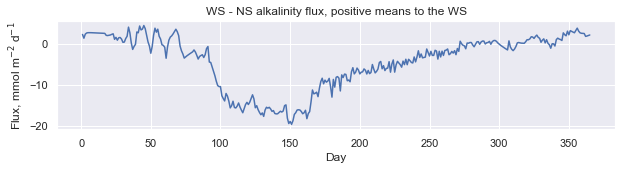

In [47]:
plt.plot(ox, total); plt.gcf().set_size_inches(10, 2);
plt.title('WS - NS alkalinity flux, positive means to the WS');
plt.xlabel('Day'); plt.ylabel('Flux, mmol m$^{-2}$ d$^{-1}$');

In [48]:
year = (('2011-01-01','2011-01-31'), ('2011-02-01','2011-02-28'), ('2011-03-01','2011-03-31'), ('2011-04-01','2011-04-30'), 
        ('2011-05-01','2011-05-31'), ('2011-06-01','2011-06-30'), ('2011-07-01','2011-07-31'), ('2011-08-01','2011-08-31'),
        ('2011-09-01','2011-09-30'), ('2011-10-01','2011-10-31'), ('2011-11-01','2011-11-30'), ('2011-12-01','2011-12-31'))

In [49]:
nh4ta_year = []
no3ta_year = []
po4ta_year = []
so4ta_year = []
for month in year:
    nh4ta_month = nh4ta_df.loc[month[0]:month[1]]
    no3ta_month = no3ta_df.loc[month[0]:month[1]]
    po4ta_month = po4ta_df.loc[month[0]:month[1]]
    so4ta_month = so4ta_df.loc[month[0]:month[1]]
    nh4ta_year.append(nh4ta_month['TA_due_to_NH4'].sum())
    no3ta_year.append(no3ta_month['TA_due_to_NO3'].sum())
    po4ta_year.append(po4ta_month['TA_due_to_PO4'].sum())
    so4ta_year.append(so4ta_month['TA_due_to_SO4'].sum())

In [50]:
nh4ta = np.array(nh4ta_year)
no3ta = np.array(no3ta_year)
po4ta = np.array(po4ta_year)
so4ta = np.array(so4ta_year)
total = nh4ta+no3ta+po4ta+so4ta

here and further, units: mmol m$^{-2}$

In [51]:
nh4ta

array([ -49.165688,  -43.816456,  -90.889465, -214.79053 , -315.2443  ,
       -279.25165 , -249.58257 , -225.63641 , -129.33257 ,  -73.267   ,
        -54.950443,  -56.228294], dtype=float32)

In [52]:
sum(nh4ta)

-1782.1553573608398

In [53]:
no3ta

array([  30.599077,   25.372398,  -28.145893, -272.396   , -350.18588 ,
       -178.3918  ,  -23.799318,    6.751259,    9.251296,   17.595901,
          4.373044,   23.166477], dtype=float32)

In [54]:
sum(no3ta)

-735.8094367980957

In [55]:
po4ta

array([ 5.840242 ,  5.8934035,  4.418116 , -4.7277765, -3.2842495,
        4.554328 , 13.658384 , 14.652812 ,  9.347592 ,  6.3880243,
        5.3478556,  6.931885 ], dtype=float32)

In [56]:
sum(po4ta)

69.02061676979065

In [57]:
so4ta

array([ 52.207603 ,  36.910786 ,  32.599014 ,  21.783455 ,   6.9661665,
       -86.91502  , -95.949745 , -57.057762 , -17.713718 ,  13.52984  ,
        29.566452 ,  53.448547 ], dtype=float32)

In [58]:
sum(so4ta)

-10.624384880065918

In [59]:
total

array([  39.481236,   24.360132,  -82.01823 , -470.13086 , -661.7482  ,
       -540.00415 , -355.67325 , -261.2901  , -128.44739 ,  -35.753235,
        -15.663094,   27.318615], dtype=float32)

In [60]:
sum(total)

-2459.5685482025146